In [1]:
import pandas as pd
import numpy as np

import string

import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from graphviz import Digraph

In [2]:
def graph(df, eng = 'dot'):
    edge_style = ""
    g = Digraph(engine=eng)
    for k, row in enumerate(df.index):
        if any(df.iloc[k]) or any(df[row]):
            g.node(str(k),row, shape='oval', fontsize='10', width='0') 

    for j, col in enumerate(df.columns):
        for i, row in enumerate(df[col]):
            
            if(row):
                if row == 1:
                    edge_style = "solid"     
                elif row == -1:
                    edge_style="dashed"
                elif row == -2:
                    edge_style = "dotted"

                g.edge(str(i), str(j), label='',style= edge_style)  
    return g

In [3]:
def gen_all_relations_df(df, df_ref):
    confMatrix = np.zeros([2,2], dtype=int)
    df_con_graph = df
    
    for col, col_ref in zip(df.columns, df_ref.columns):
        for row, row_ref, index in zip(df[col], df_ref[col_ref], np.arange(0,len(df.columns))):
            if(df[col].index[index] != col):
                if row != row_ref and row == 1:
                    df_con_graph[col][index] = -1 #false positve
                elif row != row_ref and row == 0:
                    df_con_graph[col][index] = -2    #falsa negative
    return df_con_graph

In [4]:
col_labels = ['xmeas%02d_low' % x for x in [1,2,3,8,9,21]]+ ['xmeas%02d_high' % x for x in [1,2,3,8,9,21]] 
df_mat = np.zeros([12,12], dtype=int)

ref_df = pd.DataFrame(df_mat, columns = col_labels, index=col_labels)
ref_df.loc['xmeas01_low'][['xmeas21_high', 'xmeas09_low']] = [1,1]
ref_df.loc['xmeas09_low']['xmeas21_high'] = 1

ref_df.loc['xmeas01_high'][['xmeas21_low', 'xmeas09_high']] = [1,1]
ref_df.loc['xmeas09_high']['xmeas21_low'] = 1

In [5]:
cen_normal = "normal/inter/"
cen_media2 = "mean2/inter/"
cen_media5 = "mean5/inter/"

cen_normal_rate = cen_normal+"rates/"
cen_media2_rate = cen_media2+"rates/"
cen_media5_rate = cen_media5+"rates/"

In [6]:
graph_normal = gen_all_relations_df(pd.read_csv(cen_normal+"20.0_sel_corr.csv", index_col=0), ref_df)

In [7]:
graph_m2 = gen_all_relations_df(pd.read_csv(cen_media2+"20.0_sel_corr.csv", index_col=0), ref_df)

In [8]:
graph_m5 = gen_all_relations_df(pd.read_csv(cen_media5+"20.0_sel_corr.csv", index_col=0), ref_df)

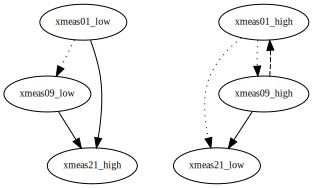

In [9]:
graph(graph_normal)

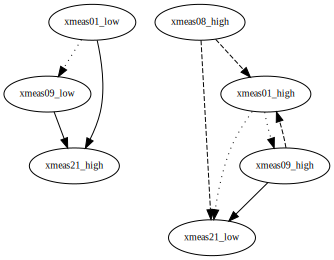

In [10]:
graph(graph_m2, 'dot')

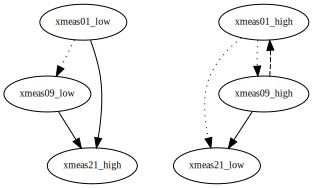

In [11]:
graph(graph_m5)